In [1]:
from IPython.display import HTML
import binascii
import os
uid = binascii.hexlify(os.urandom(8)).decode()
def hide_all_code_slideshow():
    toggle = """
    <script>
    code_show=true; 
    function code_toggle() {
     if (code_show){
     $('div.input').hide();
     } else {
     $('div.input').show();
     }
     code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script>
    The raw code for this IPython notebook is by default hidden for easier reading.
    To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.
    """
    return toggle

HTML(hide_all_code_slideshow())

##  Campus Recruitment
### Academic and Employability Factors influencing placement
（其实就是用一些变量预测一个人能不能找到工作）
<br>
<br>
<center><img src="https://ftp.bmp.ovh/imgs/2021/06/1c2197b8f378c242.png" style="zoom:50%;" /></center>


### Hello
My name is Ben Roshan D, doing MBA in Business Analytics at Jain University Bangalore . We have practical sessions in Python,R as subjects. Faculties provide us with such data sets to work on with it, So here is one of the data set which our class worked on

### What is in it?
This data set consists of Placement data of students in a XYZ campus. It includes secondary and higher secondary school percentage and specialization. It also includes degree specialization, type and Work experience and salary offers to the placed students

<div align="right">
  （ps：内容搬运自Kaggle）
</div>

In [1]:
import pandas as pd 
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### <center>用来做预测的变量</center>
|     变量名     |        说明         |
| :------------: | :-----------------: |
|     gender     |        性别         |
|     ssc_p      |   初中课程平均分    |
|     ssc_b      | 初中教育委员会级别  |
|     hsc_p      |   高中课程平均分    |
|     hsc_b      | 高中教育委员会级别  |
|     hsc_s      |  在高中选择的专业   |
|    degree_p    |   本科课程平均分    |
|    degree_t    |      本科专业       |
|     workex     |   是否有工作经验    |
|    etest_p     |  就业能力测试分数   |
| specialisation |   MBA硕士研究方向   |
|     mba_p      | MBA硕士课程平均分数 |

### <center>先看一下数据长什么样</center>

In [2]:
data=pd.read_csv(r'C:\Users\freshman314\Desktop\data.csv')
data=data.iloc[:,1:]
data

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [3]:
numerical = (data.dtypes == "float64")
numerical_list = list(numerical[numerical].index)
def dou_bar(variable,colors):
    sns.histplot(data=data.iloc[(data['status']=='Placed').values,:], x=variable,kde=True,color=colors)
    sns.histplot(data=data.iloc[(data['status']=='Not Placed').values,:], x=variable,kde=True,color='grey')
    plt.legend(['Placed','Not Placed'])

### <center>将salary列的缺失值填补为0</center>

In [4]:
data['salary']=data['salary'].fillna(0)
data

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


### <center>很好，接下来让我们把数据画成图</center>

In [5]:
numerical = (data.dtypes == "float64")
numerical_list = list(numerical[numerical].index)
def dou_bar(variable,colors):
    sns.histplot(data=data.iloc[(data['status']=='Placed').values,:], x=variable,kde=True,color=colors)
    sns.histplot(data=data.iloc[(data['status']=='Not Placed').values,:], x=variable,kde=True,color='grey')
    plt.legend(['Placed','Not Placed'])

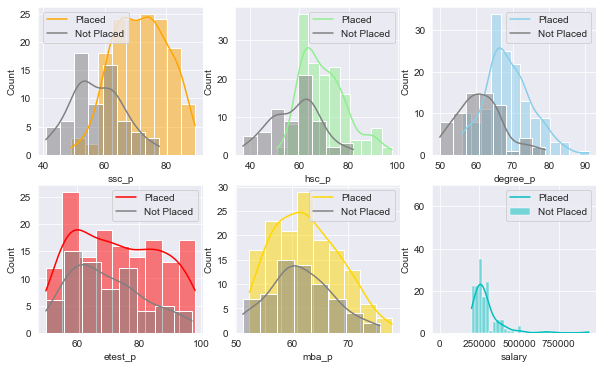

In [10]:
color=["orange","lightgreen","skyblue","red","gold","c"]
sns.set_style('darkgrid')
i = 1
plt.figure(figsize=(10, 6))
for c in numerical_list:
    plt.subplot(2, 3, i)
    dou_bar(c,color[i-1])
    i += 1

### <center>对定性数据进行独热编码</center>

In [7]:
cat_cols=["gender","ssc_b","hsc_b","hsc_s","degree_t","workex","specialisation"]
data_dumcat=pd.get_dummies(data[cat_cols]) 
data_dumcat

,gender_F,gender_M,ssc_b_Central,ssc_b_Others,hsc_b_Central,hsc_b_Others,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR
0,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1
1,0,1,1,0,0,1,0,0,1,0,0,1,0,1,1,0
2,0,1,1,0,1,0,1,0,0,1,0,0,1,0,1,0
3,0,1,1,0,1,0,0,0,1,0,0,1,1,0,0,1
4,0,1,1,0,1,0,0,1,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0
211,0,1,0,1,0,1,0,0,1,0,0,1,1,0,1,0
212,0,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0
213,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0,1


### <center>对定量数据进行标准化处理</center>

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y['status'],test_size=0.2,random_state=123)

NameError: name 'x' is not defined

### 降维

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components='mle').fit(x_train)
x_trainPCA=pca.transform(x_train)
x_testPCA=pca.transform(x_test)
print(x_trainPCA.shape)
print(x_testPCA.shape)

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
silhouettteScore=[]
for i in range(2,15):
    kmeans=KMeans(n_clusters=i,random_state=123).fit(x_trainPCA)
    score1=silhouette_score(x_trainPCA,kmeans.labels_)
    silhouettteScore.append(score1)
sns.set(style='darkgrid')
plt.figure(figsize=(8,8))
plt.plot(range(2,15),silhouettteScore,linestyle='-',color='grey')
plt.xlabel('number of cluster',fontsize=15)
plt.ylabel('score',fontsize=15)
plt.show()

In [ ]:
from sklearn.metrics import fowlkes_mallows_score
for i in range(2,7):
    kmeans=KMeans(n_clusters=i,random_state=123).fit(x_trainPCA)
    score1=fowlkes_mallows_score(y_train,kmeans.labels_)
    print('聚{}类FMI评价分数为{}'.format(i,score1))

### 支持向量机

In [ ]:
from sklearn.svm import SVC
svm_data=SVC().fit(x_trainPCA,y_train)
from sklearn.metrics import *
y_predict=svm_data.predict(x_testPCA)
print(classification_report(y_test,y_predict))

In [ ]:
from sklearn.svm import SVC 
svm_data=SVC().fit(x_trainPCA,y_train)
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = svm_data, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [ ]:
score = []
score_test = []
gamma_range = np.logspace(-10, 1, 50) #返回在对数刻度上均匀间隔的数字
for i in gamma_range:
    clf=SVC(kernel="rbf",gamma = i,cache_size=5000).fit(x_trainPCA,y_train)
    score_test.append(clf.score(x_testPCA,y_test))
    score.append(clf.score(x_trainPCA,y_train))
print(max(score), gamma_range[score.index(max(score))])
plt.plot(gamma_range,score,color='orange')
plt.figure
plt.xlabel('gamma')
plt.plot(gamma_range,score_test,color='c')
plt.legend(['train','test'])
plt.show()

### logist回归

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_data=LogisticRegression().fit(x_trainPCA,y_train)
accuracies = cross_val_score(estimator = lr_data, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

### 随机森林

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y['salary'],test_size=0.2,random_state=123)
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.svm import SVR
# from sklearn.neighbors import KNeighborsRegressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr_data=GradientBoostingRegressor().fit(x_trainPCA,y_train)
y_predict=gbr_data.predict(x_testPCA)
plt.figure(figsize=(8,8))
plt.plot(range(y_test.shape[0]),y_test,color='c')
plt.plot(range(y_test.shape[0]),y_predict,color='orange')
plt.legend(['real data','forecast data'])
plt.ylabel('salary',fontsize=15)

In [ ]:
from sklearn.metrics import explained_variance_score,mean_absolute_error,mean_squared_error,median_absolute_error,r2_score
print('平均绝对误差为：',mean_absolute_error(y_test,y_predict))
print('均方误差为：',mean_squared_error(y_test,y_predict))
print('可解释方差值为：',explained_variance_score(y_test,y_predict))
print('中值绝对误差为：',median_absolute_error(y_test,y_predict))
print('模型的R方为：',r2_score(y_test,y_predict))